### Credit Risk Model using Machine Leanring 

Dataset: https://www.kaggle.com/competitions/GiveMeSomeCredit/data

In this project, we aim to predict the likelihood of a customer defaulting on their credit within two years, using a dataset of past customer behavior. With increasing financial instability, accurately predicting credit defaults is crucial for lenders to make informed decisions, minimize risk, and offer responsible lending solutions. The dataset contains key attributes, such as debt ratio, monthly income, and age, which can help build a model capable of identifying high-risk customers.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


We start by loading and inspecting the dataset to understand its structure, the types of variables, and basic statistics like means, medians, and ranges. This helps identify potential issues such as missing values or incorrect data types.

In [2]:
train = pd.read_csv("data/cs-training.csv").drop(['Unnamed: 0'], axis=1)

train.describe()


,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [3]:
train.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


##### Handling Duplicates
We remove any duplicate entries from the dataset to ensure that the analysis is based on unique observations. Duplicates can distort our visualizations and model performance if not handled properly.

In [96]:
train_clean_data = train.drop_duplicates()
print(f'Number of rows after duplicates have been dropped: {len(train_clean_data)}')

Number of rows after duplicates have been dropped: 149391


### Missing Data Analysis
To ensure we handle missing data properly, we first identify how many missing values there are in each column, both in terms of counts and percentages.

In [97]:
missing_values_percentage = train_clean_data.isnull().sum() / len(train_clean_data) * 100
print(missing_values_percentage)


SeriousDlqin2yrs                         0.000000
RevolvingUtilizationOfUnsecuredLines     0.000000
age                                      0.000000
NumberOfTime30-59DaysPastDueNotWorse     0.000000
DebtRatio                                0.000000
MonthlyIncome                           19.560081
NumberOfOpenCreditLinesAndLoans          0.000000
NumberOfTimes90DaysLate                  0.000000
NumberRealEstateLoansOrLines             0.000000
NumberOfTime60-89DaysPastDueNotWorse     0.000000
NumberOfDependents                       2.562403
dtype: float64


### Handling Missing Data
- For the **MonthlyIncome** field, which has 19.25% missing data, we use median imputation because the median is less sensitive to extreme values than the mean.
- For the **NumberOfDependents** field, which has 2.5% missing data, we also use median imputation, as the percentage of missing data is small and the median is appropriate for a numerical variable like this.

In [98]:
# Handle MonthlyIncome missing data 
median_income = train_clean_data['MonthlyIncome'].median()
train_clean_data.loc[:, 'MonthlyIncome'] = train_clean_data['MonthlyIncome'].fillna(median_income)

#Handle NumberOfDependants missing data
median_dependants = train_clean_data['NumberOfDependents'].median()
train_clean_data.loc[:, 'NumberOfDependents'] = train_clean_data['NumberOfDependents'].fillna(median_dependants)

### EDA

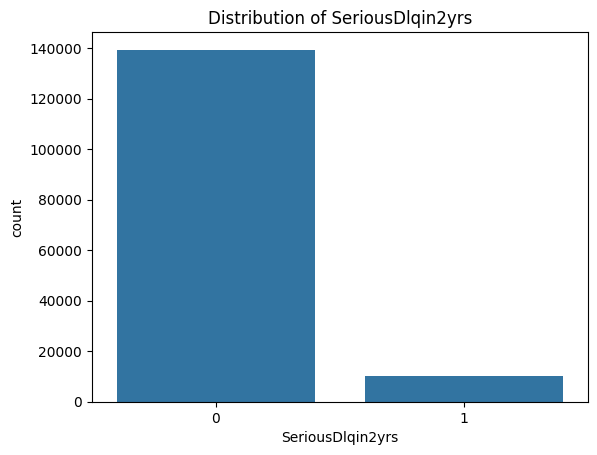

In [99]:
sns.countplot(data=train_clean_data, x='SeriousDlqin2yrs')
plt.title("Distribution of SeriousDlqin2yrs")
plt.show()

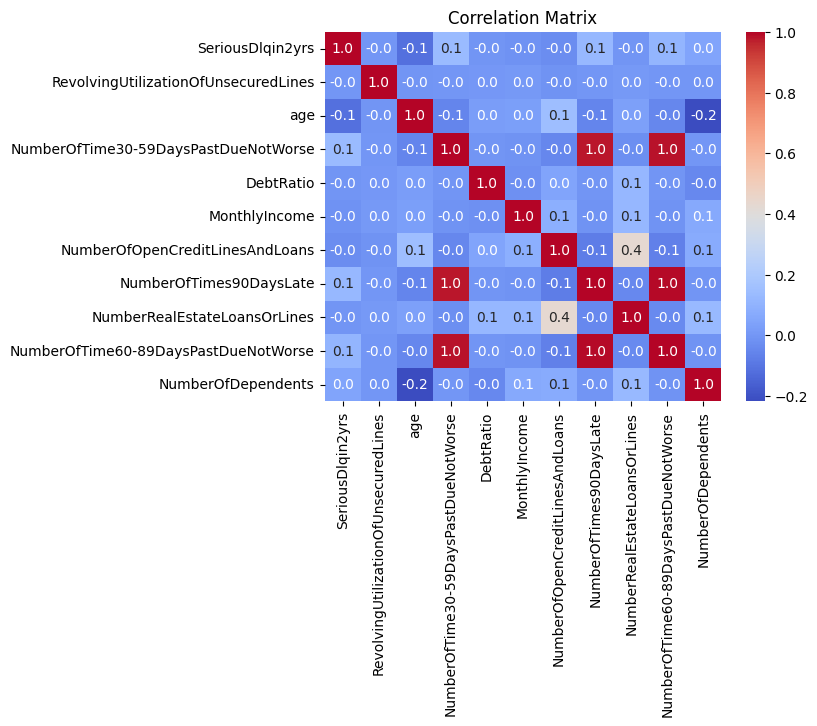

In [100]:
corr = train_clean_data.corr()
sns.heatmap(corr, annot=True, fmt=".1f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

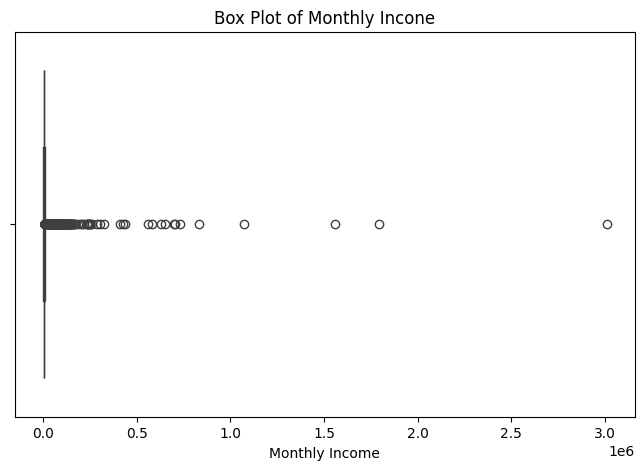

In [101]:
# Box plot for Debt Ratio
plt.figure(figsize=(8, 5))
sns.boxplot(x=train_clean_data['MonthlyIncome'])
plt.title('Box Plot of Monthly Incone')
plt.xlabel('Monthly Income')
plt.show()

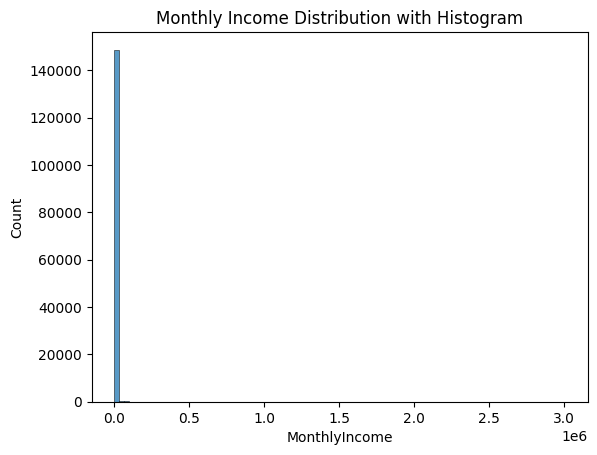

In [102]:
sns.histplot(train_clean_data['MonthlyIncome'], bins=90)
plt.title("Monthly Income Distribution with Histogram")
plt.show()

In [103]:

percentile_97 = train_clean_data['MonthlyIncome'].quantile(0.97)


outliers_above_97th = train_clean_data[train_clean_data['MonthlyIncome'] > percentile_97]
print(f"97th Percentile for Monthly Income: {percentile_97}")

print("Count of Monthly Income above the 97th percentile:", len(outliers_above_97th))

97th Percentile for Monthly Income: 16000.0
Count of Monthly Income above the 97th percentile: 4352


<Axes: xlabel='DebtRatio'>

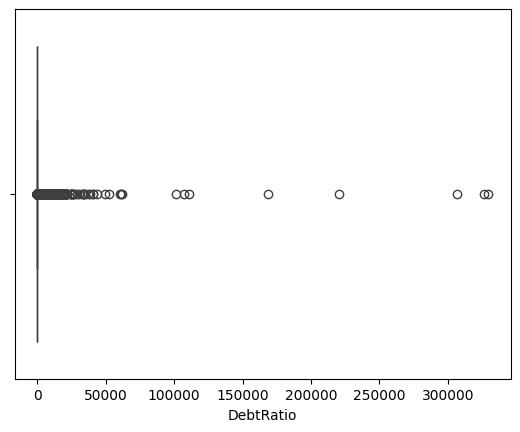

In [104]:
sns.boxplot(x=train_clean_data["DebtRatio"])

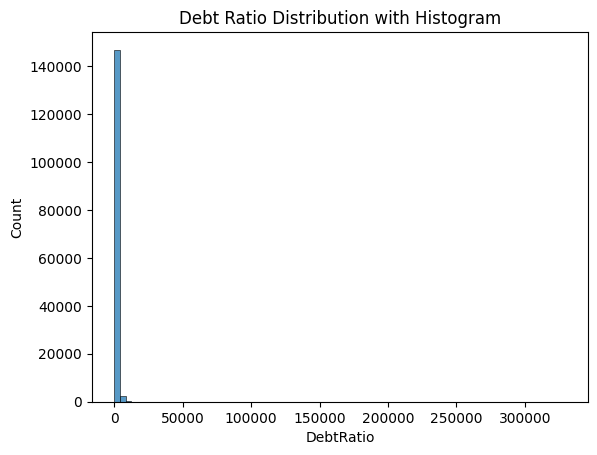

In [105]:
sns.histplot(train_clean_data['DebtRatio'], bins=80)
plt.title('Debt Ratio Distribution with Histogram')
plt.show()

In [106]:
percentile_97 = train_clean_data['DebtRatio'].quantile(0.97)


outliers_above_97th = train_clean_data[train_clean_data['DebtRatio'] > percentile_97]
print(f"97th Percentile for Debt Ratio: {percentile_97}")

print("Count of Debt Ratio above the 97th percentile:", len(outliers_above_97th))

97th Percentile for Debt Ratio: 3231.2999999999884
Count of Debt Ratio above the 97th percentile: 4482


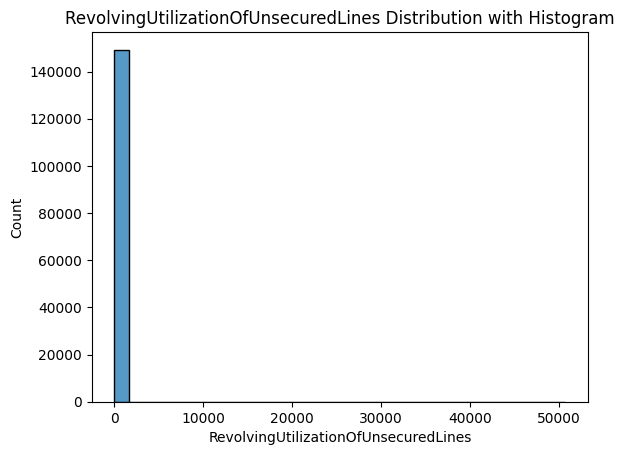

In [107]:
sns.histplot(train_clean_data['RevolvingUtilizationOfUnsecuredLines'], bins=30)
plt.title('RevolvingUtilizationOfUnsecuredLines Distribution with Histogram')
plt.show()

#### DebtRatio Capping

DebtRatio shows a skewed distribution, with values going as high as 329,664. Such extreme values are unlikely to be legitimate and may represent data entry errors or exceptional cases that do not generalize well. Hence, we capped the `DebtRatio` at the 97th percentile to remove extreme outliers while preserving the majority of the data distribution.

In [116]:
debt_ratio_97percentile = np.percentile(train_clean_data['DebtRatio'], 97)
train_clean_data.loc[:, 'DebtRatio_Cap'] = np.where(
    train_clean_data['DebtRatio'] > debt_ratio_97percentile, 
    debt_ratio_97percentile, 
    train_clean_data['DebtRatio']
)

train_clean_data['DebtRatio_Cap'].describe()

count    149391.000000
mean        286.394480
std         772.140886
min           0.000000
25%           0.177441
50%           0.368234
75%           0.875279
max        3231.300000
Name: DebtRatio_Cap, dtype: float64

### Monthly Incone and RevolvingUtilizationOfUnsecuredLines Capping 
Both feature also have skewed distribution which may affect model performance , these values may represent extreme cases in the case of MonthlyIncome and data errors in the case of RevolvingUtilizationOfUnsecuredLines, hence we will also cap them to the 97th percentile. 

In [117]:
monthly_income_97percentile =  np.percentile(train_clean_data['MonthlyIncome'], 97)
ruoucl_97percentile = np.percentile(train_clean_data["RevolvingUtilizationOfUnsecuredLines"], 97)

train_clean_data.loc[:, 'MonthlyIncome_cap'] = np.where(
    train_clean_data['MonthlyIncome'] > monthly_income_97percentile, 
    monthly_income_97percentile, 
    train_clean_data['MonthlyIncome']
)

train_clean_data.loc[:, 'RevolvingUtilizationOfUnsecuredLines_cap'] = np.where(
    train_clean_data['RevolvingUtilizationOfUnsecuredLines'] > ruoucl_97percentile, 
    ruoucl_97percentile, 
    train_clean_data['RevolvingUtilizationOfUnsecuredLines']
)

 

### Feature Scaling 
Feature scaling is important because it brings all features into a similar range, which improves the performance and convergence of many machine learning algorithms by preventing features with larger ranges from disproportionately influencing the model.

In [118]:
cols_to_scale = ['MonthlyIncome_cap', 'RevolvingUtilizationOfUnsecuredLines_cap', 'age', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio_Cap', 'NumberOfOpenCreditLinesAndLoans', 
                 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents']

scaler = MinMaxScaler()

train_clean_data.loc[:, cols_to_scale] = scaler.fit_transform(train_clean_data[cols_to_scale])



### Resampling 
Resampling, particularly using SMOTE (Synthetic Minority Over-sampling Technique), is essential when dealing with imbalanced data, as it helps create a balanced class distribution by generating synthetic samples for the minority class. This approach improves the model’s ability to learn patterns from both classes, leading to more accurate predictions and reducing bias toward the majority class.

In [111]:
from imblearn.over_sampling import SMOTE

X = train_clean_data.drop(columns=['MonthlyIncome', 'DebtRatio', 'RevolvingUtilizationOfUnsecuredLines', 'SeriousDlqin2yrs'])
y = train_clean_data['SeriousDlqin2yrs']

smote = SMOTE(random_state=42)
X_resampled , y_resampled = smote.fit_resample(X, y)

train_resampled = pd.DataFrame(X_resampled, columns=X.columns)
train_resampled['SeriousDlqin2yrs'] = y_resampled

print(train_resampled['SeriousDlqin2yrs'].value_counts())

SeriousDlqin2yrs
1    139382
0    139382
Name: count, dtype: int64


### Model Building 

In [112]:
# Data Split 

X  =  train_resampled.drop(columns=['SeriousDlqin2yrs'])
y = train_resampled['SeriousDlqin2yrs']

X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2, random_state=42)


#### XgBoost

In [113]:
import xgboost as xgb 

model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)



/Users/akash/.pyenv/versions/3.9.20/envs/ml-3.9/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:50:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [114]:
# Model Evaluation 
from sklearn.metrics import classification_report, accuracy_score

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model's performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9578677380589385

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96     27889
           1       0.98      0.93      0.96     27864

    accuracy                           0.96     55753
   macro avg       0.96      0.96      0.96     55753
weighted avg       0.96      0.96      0.96     55753



### Model Perfomace Evaluation 

Overall Model perfomance is very promising.

##### Precision 

Class 0(Non Defaulters): 0.94
Class 1(Default):  0.98

Precision measures the accuracy of positive predictions. A precision of 0.98 for class 1 indicates that when the model predicts a default, it is correct 98% of the time. The precision of 0.94 for class 0 is also good, indicating that 94% of non-default predictions are correct.


#### Recall 

Class 0(non defaulters): 0.98
Class 1 (defaulters): 0.93

Recall measures the ability to find all positive instances. A recall of 0.98 for class 0 indicates that the model captures 98% of the true non-default instances. For class 1, a recall of 0.93 indicates that 93% of actual defaults are correctly identified.


#### F1-Score 

Class 0: 0.96
Class 1: 0.96

The F1-score is the harmonic mean of precision and recall. The scores being equal at 0.96 for both classes indicate a good balance between precision and recall, making this model effective in distinguishing between the two classes.

#### Logistic Regression 

Accuracy: 0.7550625078471114
ROC-AUC: 0.8362421418902282

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.77      0.76     27889
           1       0.76      0.74      0.75     27864

    accuracy                           0.76     55753
   macro avg       0.76      0.76      0.76     55753
weighted avg       0.76      0.76      0.76     55753


Confusion Matrix:
 [[21367  6522]
 [ 7134 20730]]


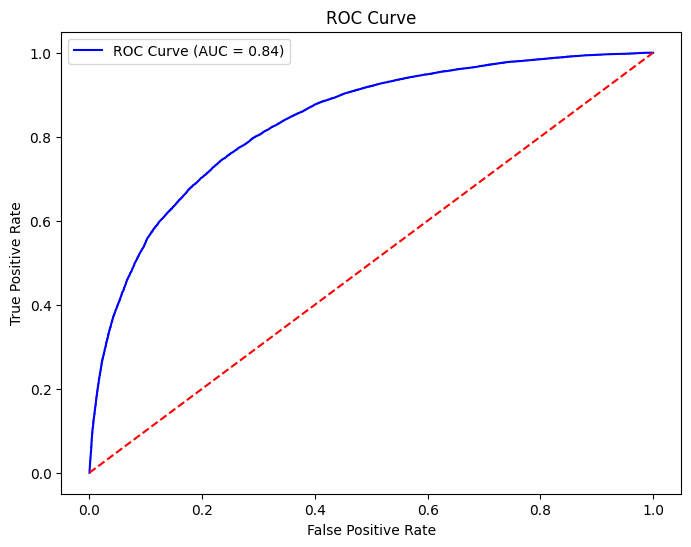

In [115]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score, roc_curve

log_reg = LogisticRegression(max_iter=1000, random_state=42)

log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)
y_prob = log_reg.predict_proba(X_test)[:, 1] # predictions for ROC-AOC

print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)


# Plot the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_prob):.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

Overall Metrics

- Accuracy: 75.5%
	- The model correctly predicted 75.5% of all cases. While this is a reasonable performance, accuracy alone may not provide a full picture due to class imbalance.
- ROC-AUC: 0.836
	- This is a strong ROC-AUC score, indicating the model has a good ability to distinguish between the positive (1) and negative (0) classes.


Classification Report

- Precision:
	- Class 0 (Non-Default): 75% of the predictions labeled as “Non-Default” were correct.
	- Class 1 (Default): 76% of the predictions labeled as “Default” were correct.
	- Precision is balanced across both classes, suggesting the model does not overly favor one class in its predictions.
- Recall:
	- Class 0 (Non-Default): 77% of actual “Non-Default” cases were correctly identified.
	- Class 1 (Default): 74% of actual “Default” cases were correctly identified.
	- The model performs slightly better at identifying “Non-Default” cases compared to “Default” cases.
- F1-Score:
	- Class 0 (Non-Default): 76%
	- Class 1 (Default): 75%
	- The F1-scores are quite close for both classes, reflecting a balanced trade-off between precision and recall.

Confusion Matrix

- True Positives (TP): 20,730
	- The model correctly identified 20,730 “Default” cases.
- True Negatives (TN): 21,367
	- The model correctly identified 21,367 “Non-Default” cases.
- False Positives (FP): 6,522
	- The model incorrectly labeled 6,522 “Non-Default” cases as “Default.”
- False Negatives (FN): 7,134
	- The model missed 7,134 “Default” cases, labeling them as “Non-Default.”

Key Takeawys: 

1.	Room for Improvement in Recall:
	- The model’s recall for the “Default” class (74%) could be improved, as it misses about 26% of actual “Default” cases.
2.  Misclassification Impact:
	- The high number of false negatives (7,134) is a concern, as failing to identify actual “Default” cases could have significant real-world implications in credit risk scenarios.
3.	ROC-AUC Strength:
	- The strong ROC-AUC score indicates the model discriminates well between classes, even if some individual cases are misclassified.

